# 03 - CatBoost. Upgraded

In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [10]:
# Load your dataset
df = pd.read_csv("Numeric data (last year work).csv")

In [11]:
# Define features (X) and target (y)
target_column = "Rating"
X = df.drop(columns=[target_column])
y = df[target_column]

In [12]:
# Feature scaling (CatBoost does not require scaling, but ensuring consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# Define parameter grid for tuning
param_grid = {
    'iterations': [500, 1000, 1500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'depth': [4, 6, 8],  # Maximum depth of trees
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization
    'random_strength': [1, 2, 5],  # Controls random feature selection
}

In [15]:
# Initialize CatBoost Regressor
catboost_model = CatBoostRegressor(verbose=0, random_seed=42)

In [ ]:
# Grid Search with Cross-Validation
grid_search = GridSearchCV(catboost_model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# I tried several times but it took
# too long (more than 10 mins every time)
# to run this code
# that is why I gave up on this one

Fitting 3 folds for each of 243 candidates, totalling 729 fits


KeyboardInterrupt: 

In [ ]:
# Best parameters found
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
# Train best model
best_catboost = CatBoostRegressor(**best_params, verbose=100, random_seed=42)
best_catboost.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

In [ ]:
# Make predictions
y_pred = best_catboost.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Lower MSE = better model
# Lower RMSE = better model
# Lower MAE = better model
# R² Score
# 1.0: Perfect model (explains all the variance).
# 0.0: Model performs no better than a horizontal line (mean prediction).

# my opinion:
# results are a bit better than in previous models
# but again we still have a real low score R² Score

# the method with best hyperparameters
# did not help in this situation

Mean Squared Error (MSE): 0.1228
Root Mean Squared Error (RMSE): 0.3504
Mean Absolute Error (MAE): 0.2792
R² Score: 0.5411


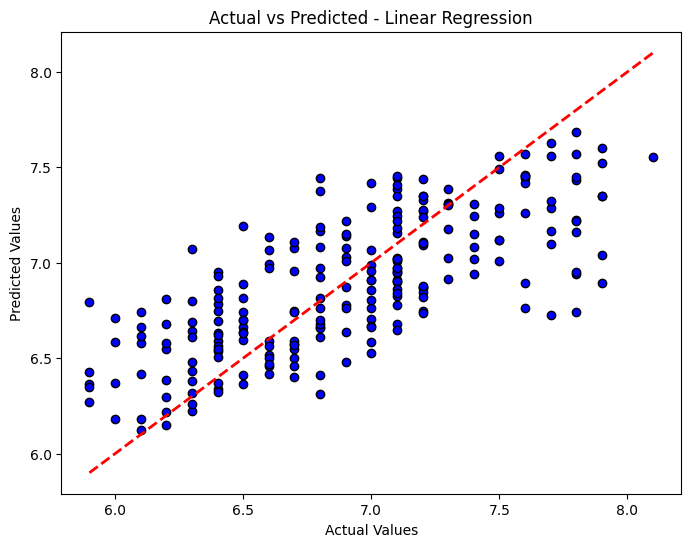

In [ ]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

# Lineat regression model had a better graph

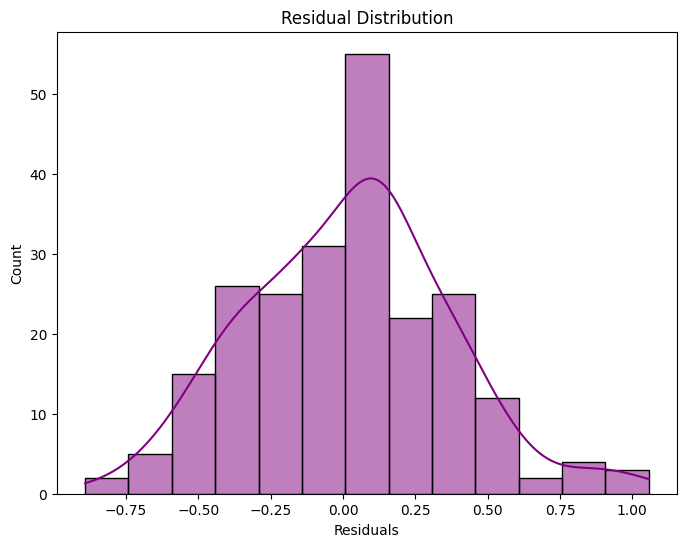

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# distribution looks good